# Praca domowa 9

## Import danych

In [1]:
import numpy as np
import pandas as pd 

data = pd.read_csv("hyperplane.txt",sep=" ",header=None)
labels = pd.read_csv("hyperplane_labels.csv",sep=" ",header=None)

In [2]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,0.397174,0.347518,0.294057,0.506484,0.115967,0.770536,0.659893,0.156747,0.378202,0.139763
1,0.275030,0.075388,0.610592,0.954931,0.274069,0.190202,0.001299,0.683527,0.486260,0.487515
2,0.233156,0.889909,0.038327,0.592379,0.655174,0.119839,0.652477,0.984323,0.206738,0.374650
3,0.277937,0.340915,0.265790,0.116670,0.136830,0.546089,0.494619,0.015384,0.358995,0.242478
4,0.254909,0.777916,0.225022,0.983103,0.803619,0.836315,0.163104,0.637497,0.008760,0.631190


In [3]:
labels.head()

,0
0,0
1,0
2,1
3,0
4,0


In [4]:
data_1 = data[0:20000]
data_2 = data[180000:200000]

In [61]:
labels_1 = labels[0:20000]
labels_2 = labels[180000:200000]

In [62]:
data_1.shape

(20000, 10)

In [63]:
labels_1.shape

(20000, 1)

In [7]:
from sklearn.model_selection import train_test_split

X_1 = data_1
y_1 = labels_1

X_2 = data_2
y_2 = labels_2

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.33, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.33, random_state=42)

## Budowa modeli

In [8]:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression(random_state=0, solver='lbfgs')
model_1.fit(X_train_1, y_train_1.values.ravel())

print("Model score: " + str(model_1.score(X_test_1,y_test_1)))

Model score: 0.8930303030303031


In [19]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression(random_state=0, solver='lbfgs')
model_2.fit(X_train_2, y_train_2.values.ravel())

print("Model score: " + str(model_2.score(X_test_2,y_test_2)))

Model score: 0.8760606060606061


## Dryf w danych - histogramy rozkładów kolejnych zmiennych

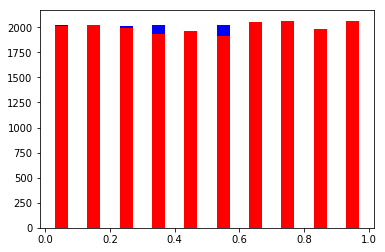

Wartość zmiany (intersection distance): 0.011


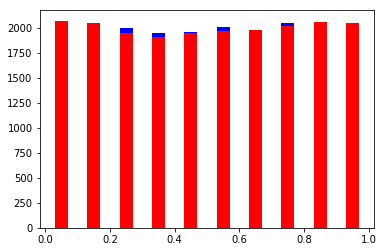

Wartość zmiany (intersection distance): 0.009


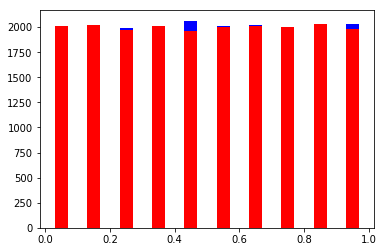

Wartość zmiany (intersection distance): 0.01


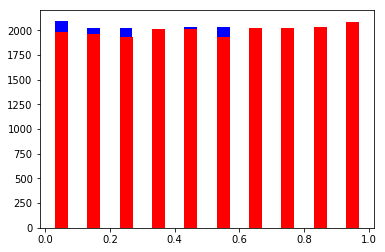

Wartość zmiany (intersection distance): 0.019


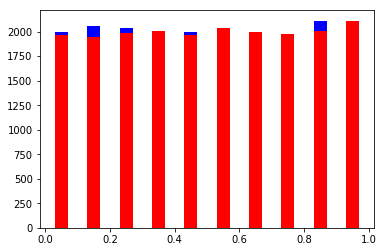

Wartość zmiany (intersection distance): 0.016


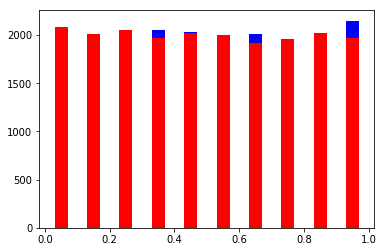

Wartość zmiany (intersection distance): 0.018


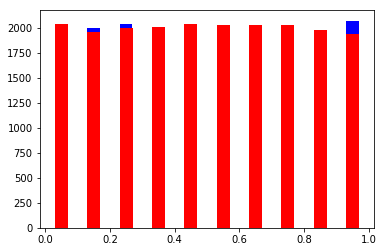

Wartość zmiany (intersection distance): 0.011


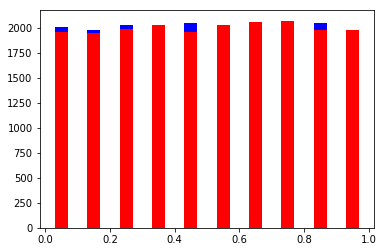

Wartość zmiany (intersection distance): 0.013


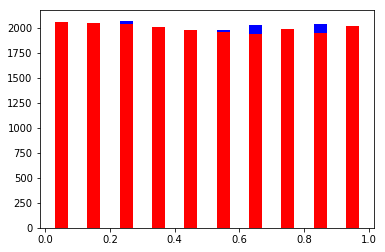

Wartość zmiany (intersection distance): 0.012


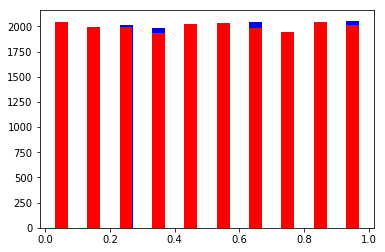

Wartość zmiany (intersection distance): 0.009


In [78]:
import matplotlib.pyplot as plt

for i in range(10):
    n_1, bins_1, patches_1 = plt.hist(x=data_1[i],bins=10,rwidth=0.4,color='blue')
    n_2, bins_2, patches_2 = plt.hist(x=data_2[i],bins=10,rwidth=0.4,color='red')
    plt.show()

    intersection_distance = 0

    for i in range(len(n_1)):
        intersection_distance += min(n_1[i],n_2[i])
    
    print("Wartość zmiany (intersection distance): " + str(round(1-intersection_distance/len(data_1[i]),3)))


__Wykresy przedstawiają podobieństwo rozkładów kolejnych zmiennych. Jak widać zarówno po wykresach, jak i obliczonych wartościach bliskich 0 dla wszystkich zmiennych, nie zaobserwowano istotnego dryfu w danych.__

## Dryf reszt - histogram rozkładów reszt

In [11]:
y_preds_1 = model_1.predict_proba(X_test_1)[:,1]
y_preds_2 = model_1.predict_proba(X_test_2)[:,1]

residuals_1 = np.subtract(y_test_1.values.T, y_preds_1)
residuals_2 = np.subtract(y_test_2.values.T, y_preds_2)

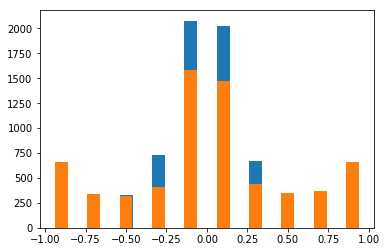

Wartość zmiany (intersection distance): 0.244


In [74]:
n_1, bins_1, patches_1 = plt.hist(x=residuals_1.flatten(),bins=10,rwidth=0.4)
n_2, bins_2, patches_2 = plt.hist(x=residuals_2.flatten(),bins=10,rwidth=0.4)
plt.show()

intersection_distance = 0

for i in range(len(n_1)):
    intersection_distance += min(n_1[i],n_2[i])

print("Wartość zmiany (intersection distance): " + str(round(1-intersection_distance/len(y_preds_1),3)))

__W przeciwieństwie do dryfu w danych, wartość dryfu w resztach jest duża.__

## Dryfty konceptów - wykresy PDP

### Krzywe PDP

__Poniżej przedstawiono wykresy PDP dla kolejnych zmiennych w obu modelach: wytrenowanych na danych z początku oraz z końca zbioru danych__

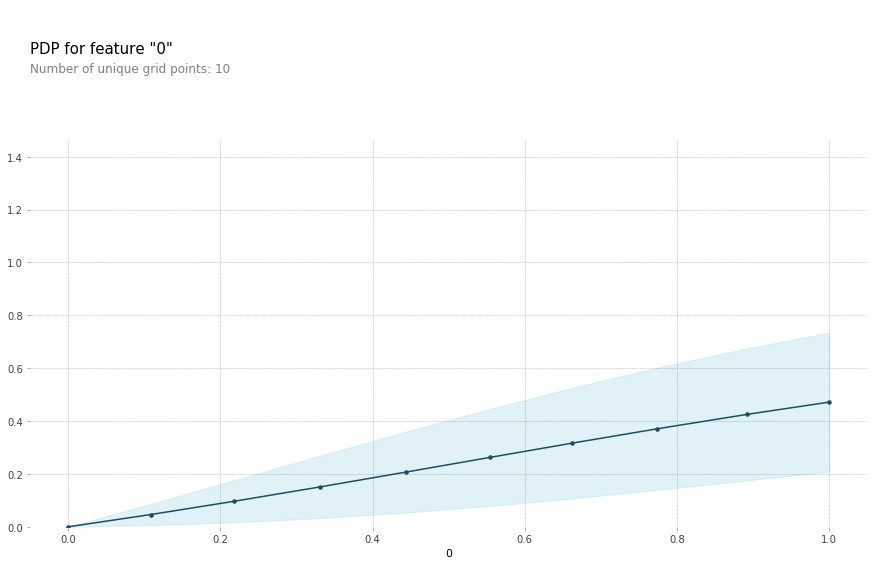

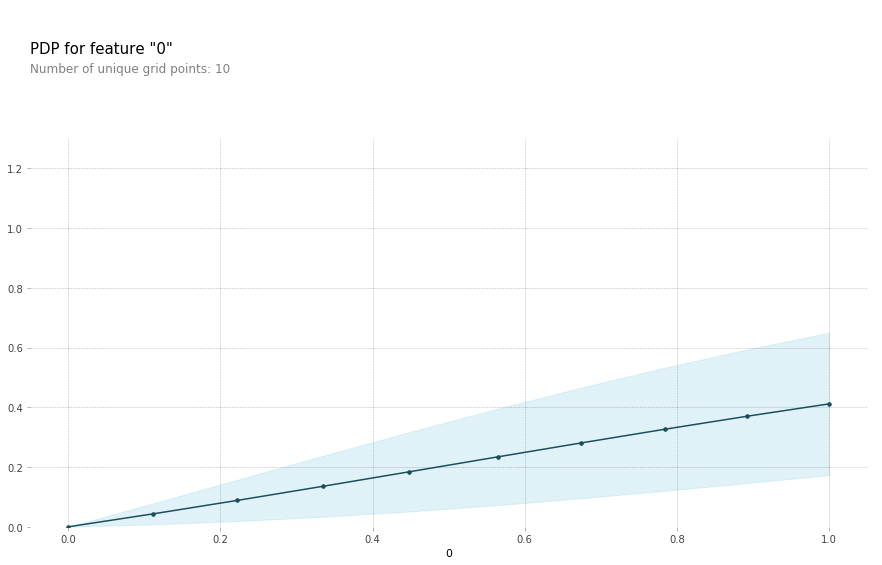

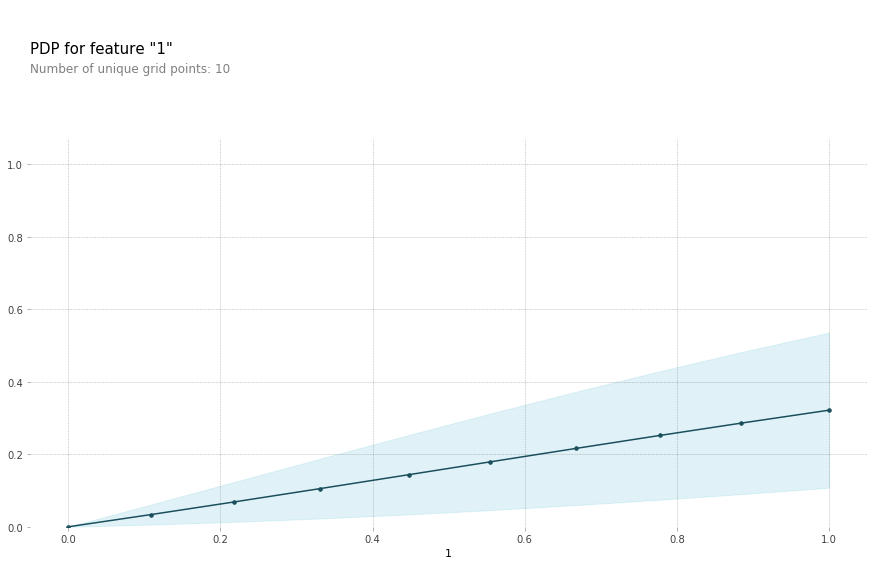

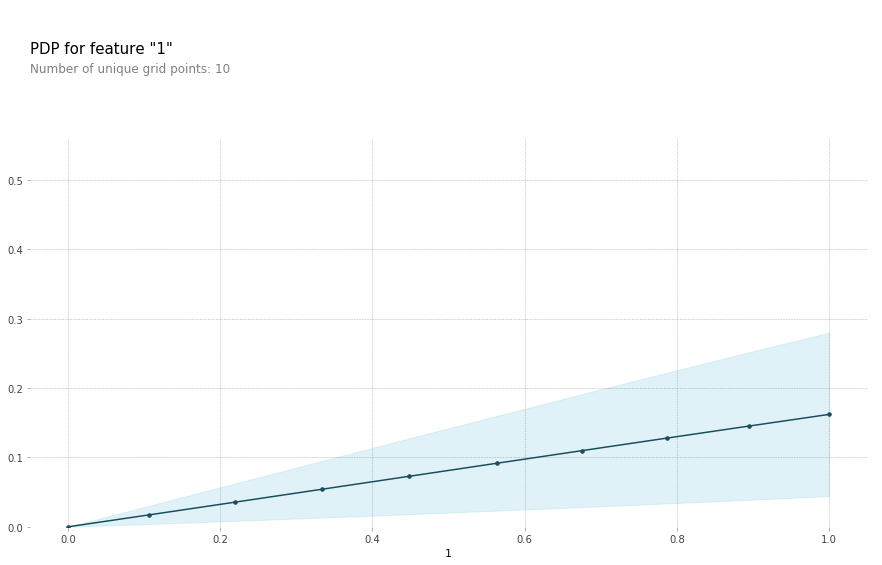

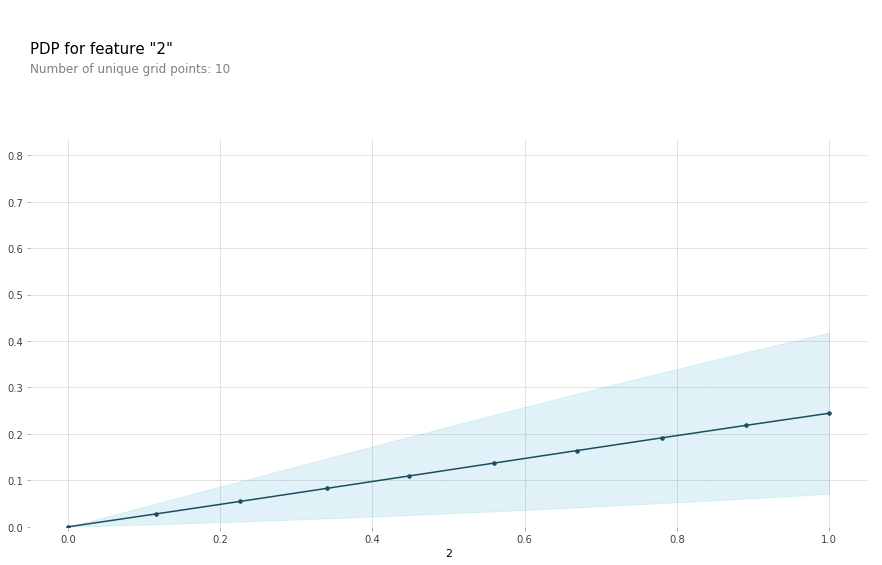

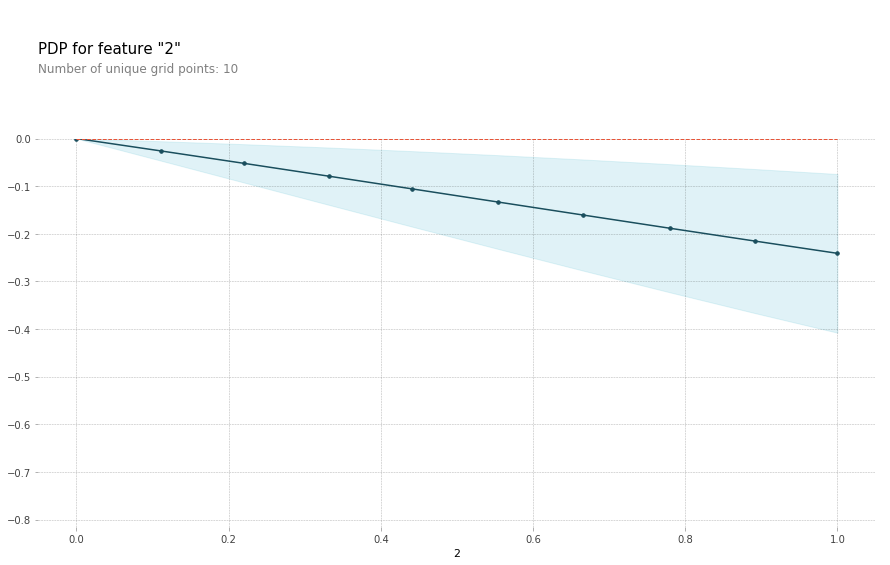

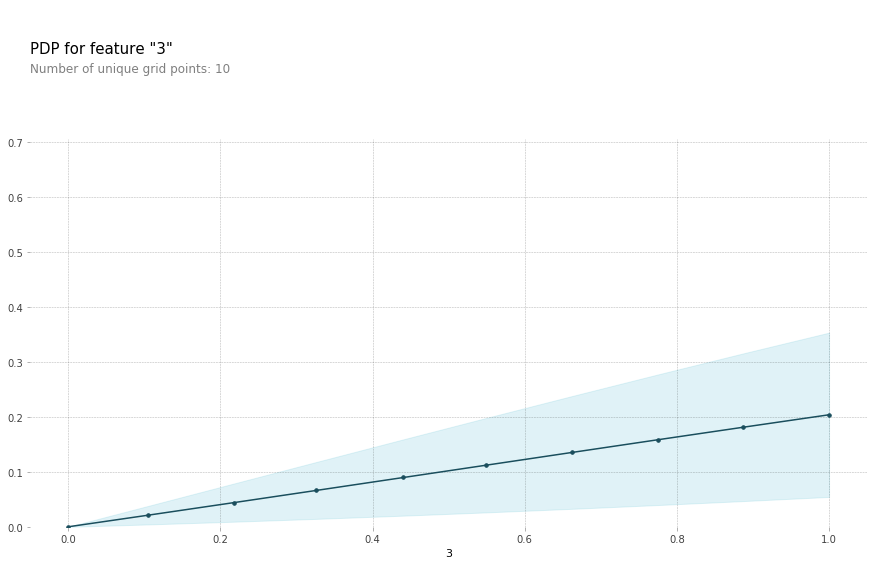

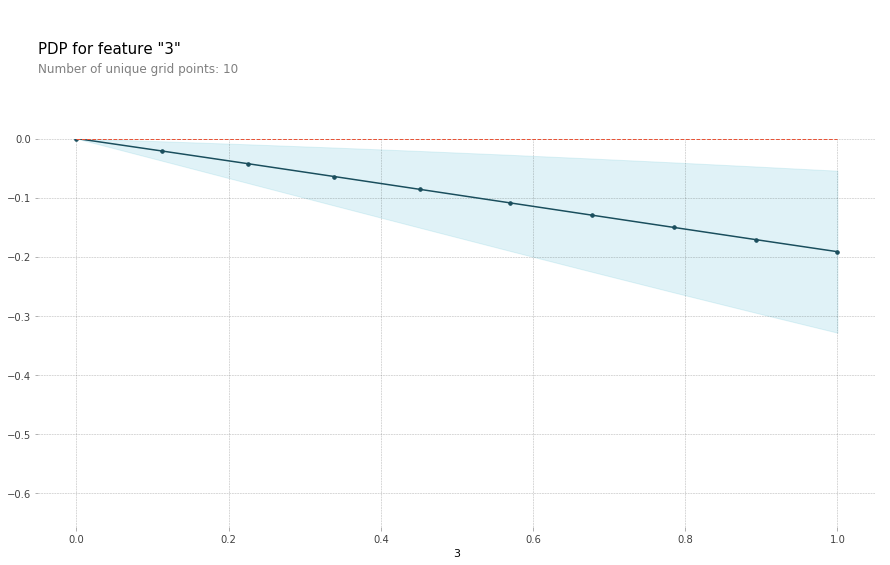

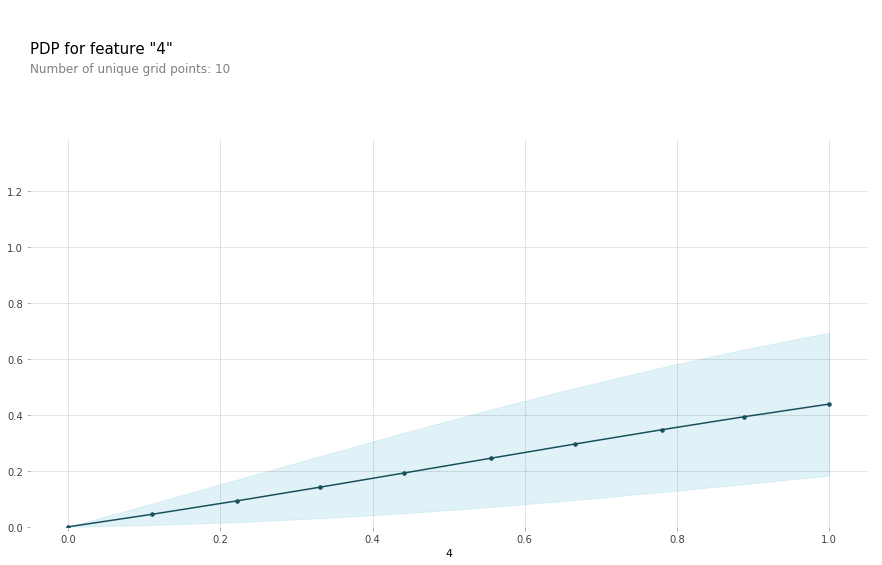

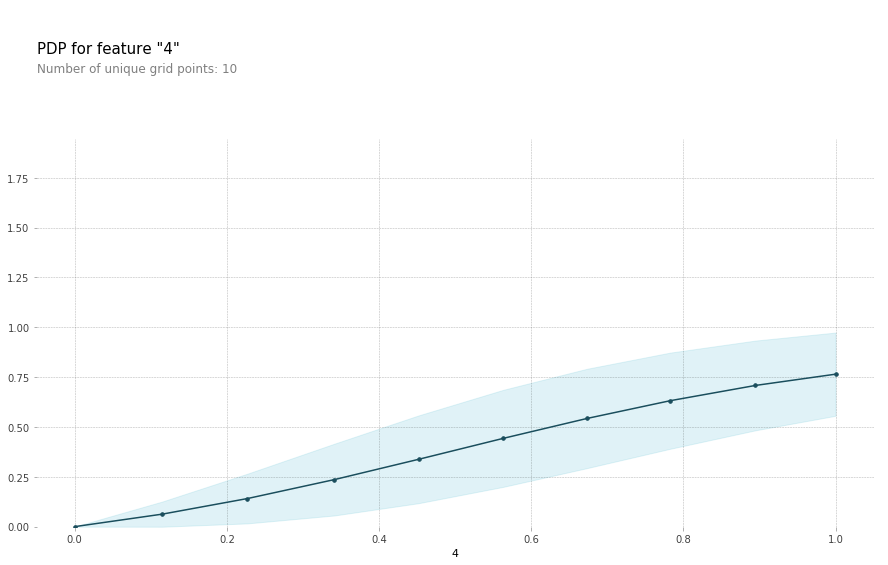

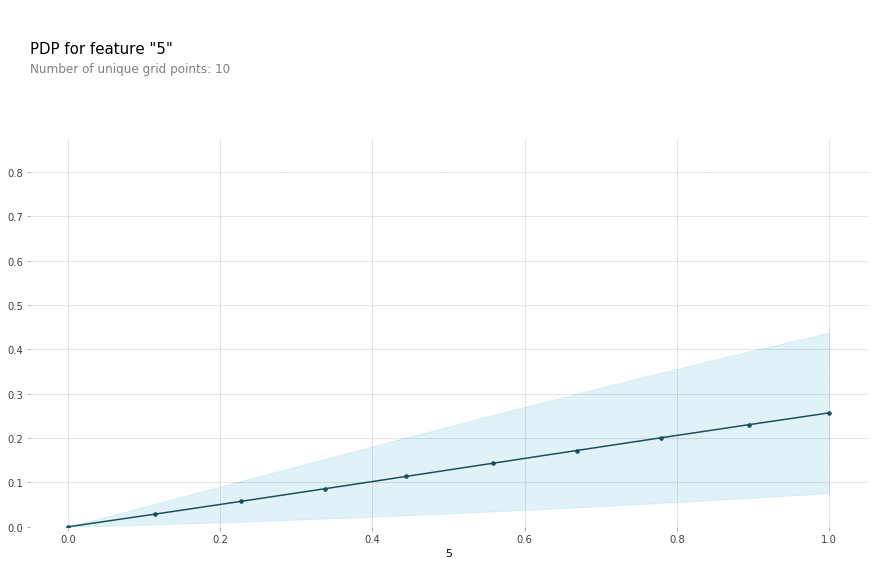

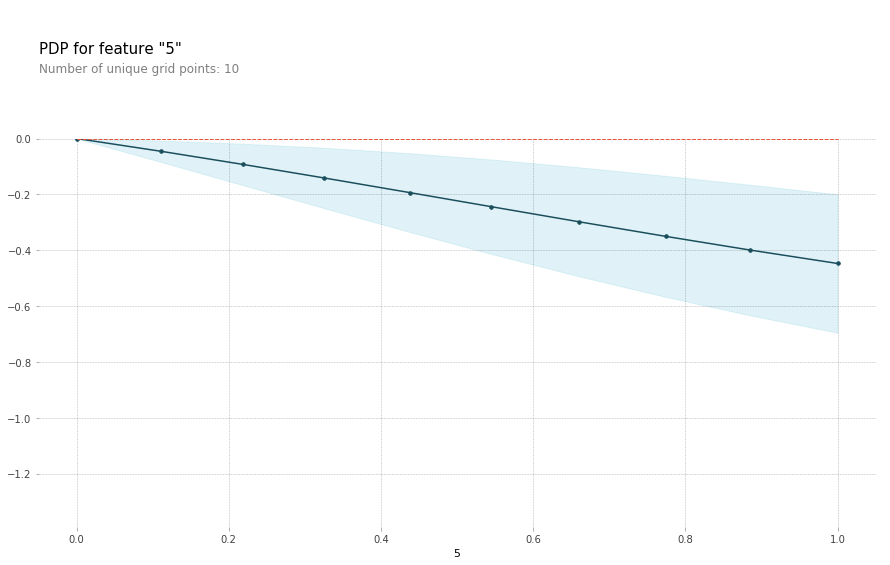

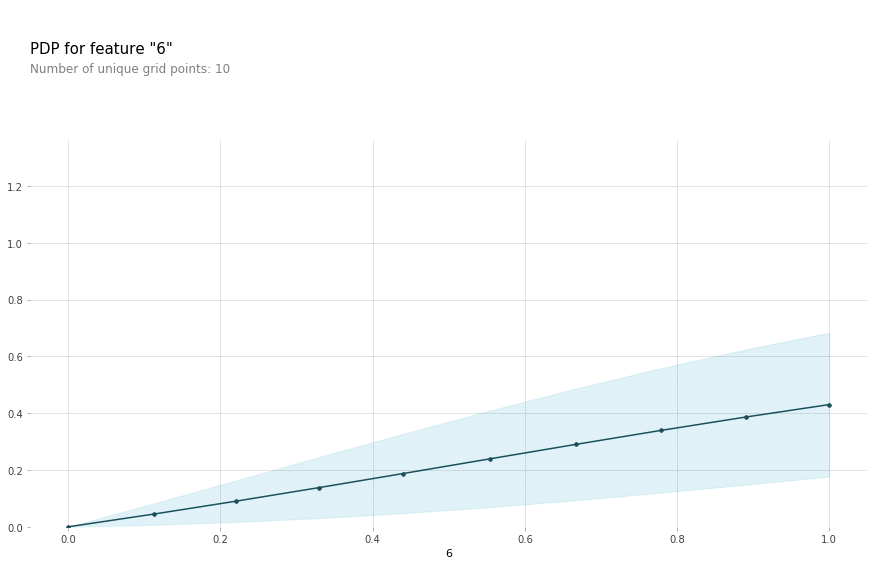

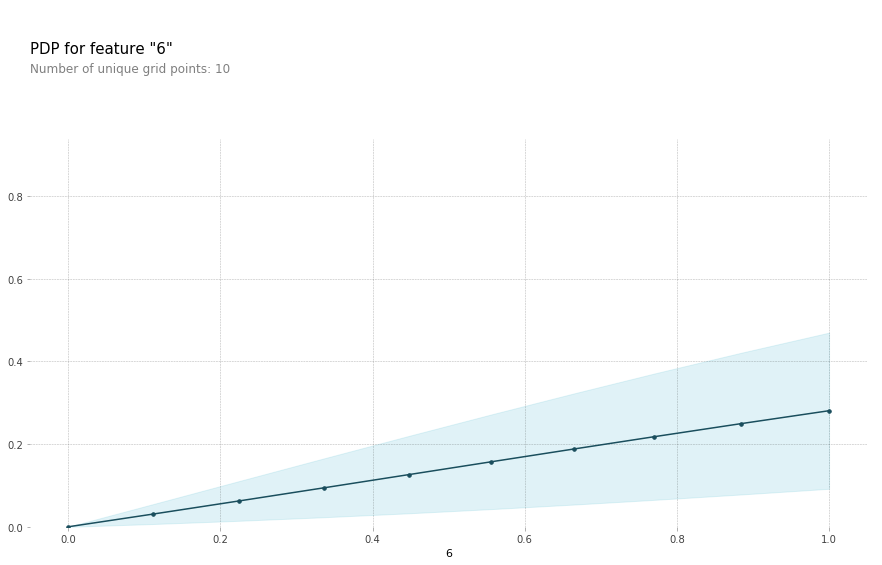

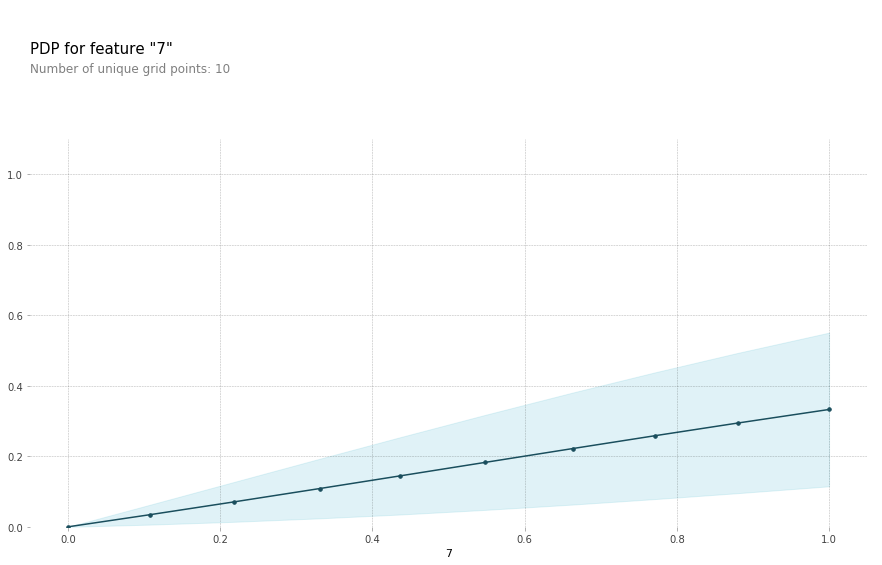

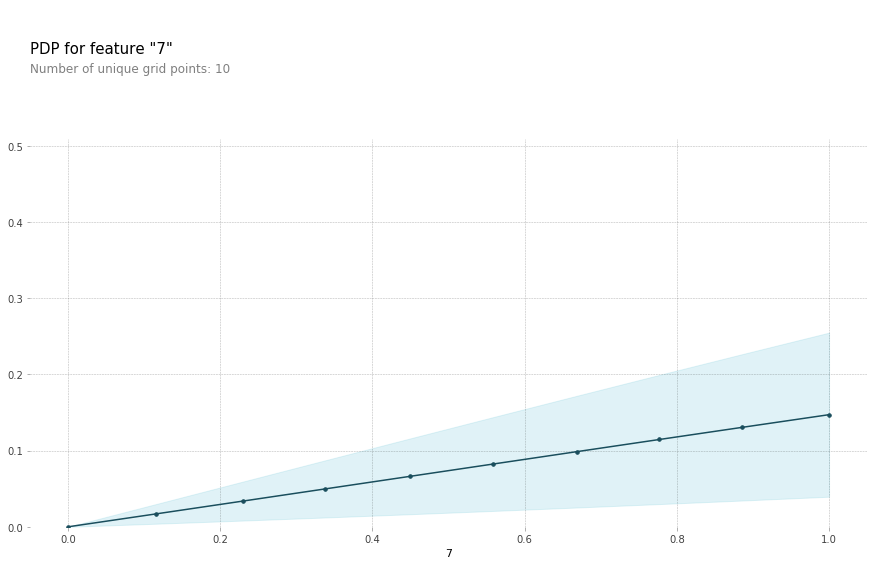

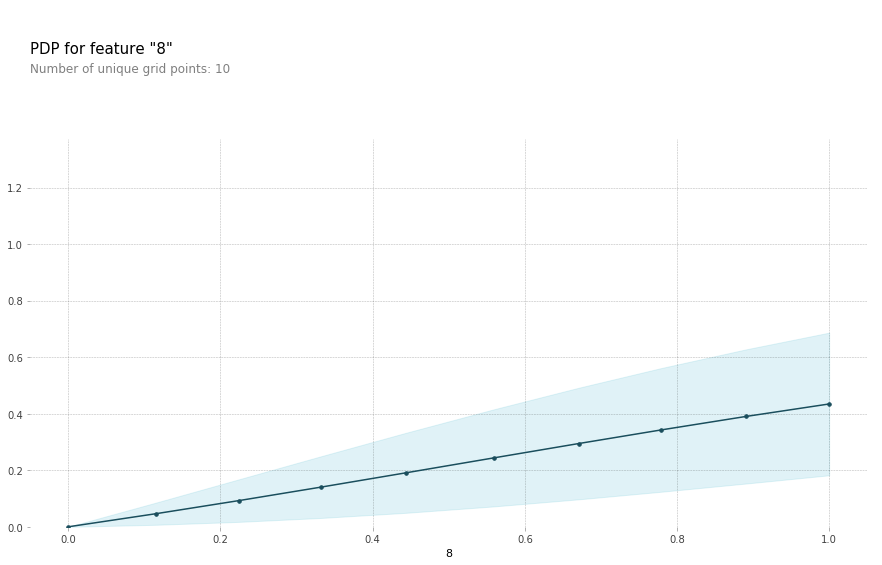

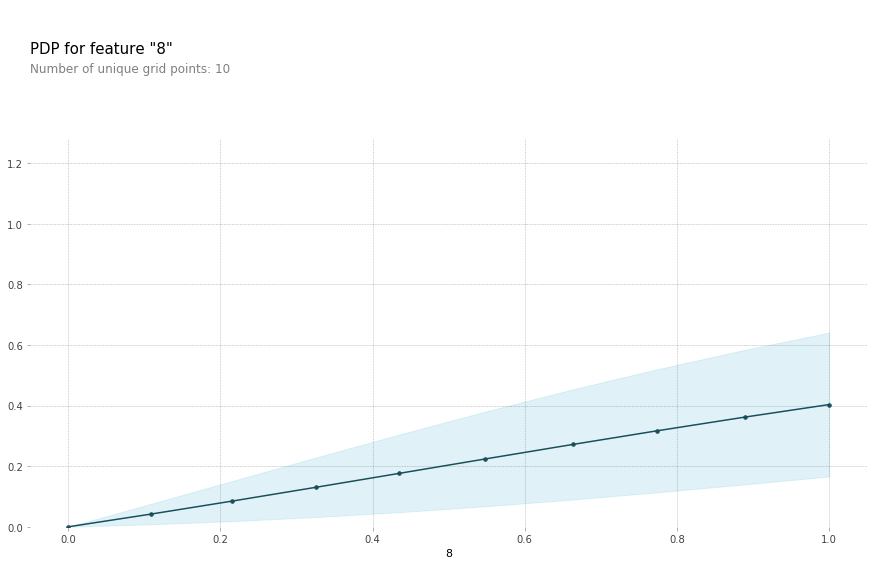

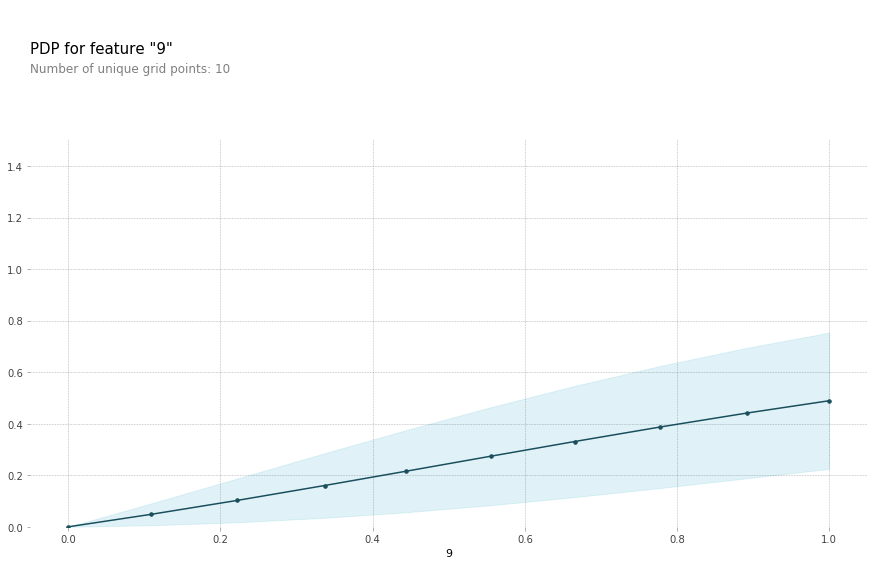

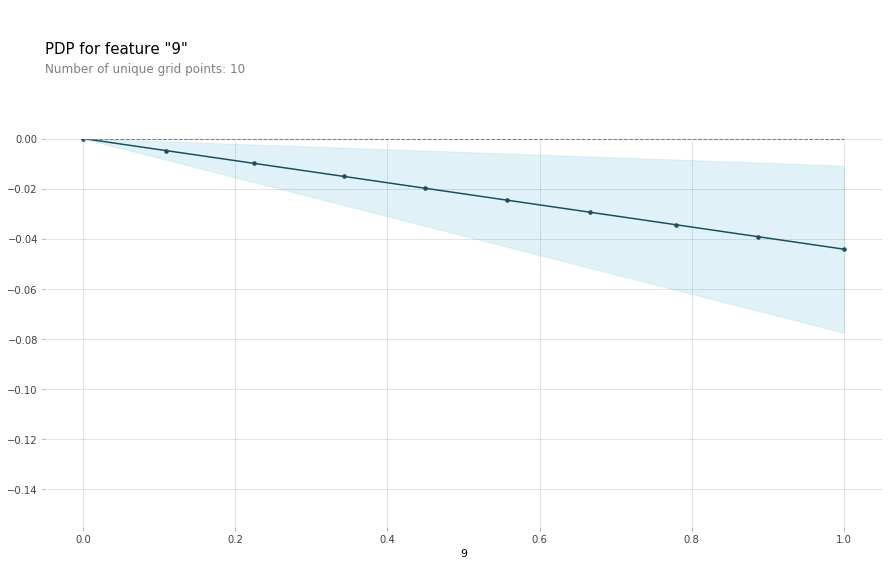

In [59]:
from pdpbox import pdp, get_dataset, info_plots

pdp_plots_1 = {}
pdp_plots_2 = {}

for i in range(len(X_train_1.columns)):
    
    pdp_f1 = pdp.pdp_isolate(model=model_1, dataset=X_train_1, model_features=X_train_1.columns, feature=i)
    fig, axes1 = pdp.pdp_plot(pdp_f1, i, frac_to_plot=500)
    line = fig.gca().get_lines()[0]
    pdp_plots_1[i] = line.get_xydata()

    pdp_f2 = pdp.pdp_isolate(model=model_2, dataset=X_train_2, model_features=X_train_2.columns, feature=i)
    fig, axes2 = pdp.pdp_plot(pdp_f2, i, frac_to_plot=500)
    line = fig.gca().get_lines()[0]
    pdp_plots_2[i] = line.get_xydata()

### Obliczenie pola pomiędzy krzywymi

In [79]:
from shapely.geometry import Polygon

diff_areas = []

for i in range(len(pdp_plots_1)):

    polygon_points = [] 
    
    for xyvalue in pdp_plots_1[i]:
        polygon_points.append([xyvalue[0],xyvalue[1]]) 

    for xyvalue in pdp_plots_2[i][::-1]:
        polygon_points.append([xyvalue[0],xyvalue[1]]) 

    for xyvalue in pdp_plots_1[i][0:1]:
        polygon_points.append([xyvalue[0],xyvalue[1]]) 

    polygon = Polygon(polygon_points)
    area = polygon.area
    diff_areas.append(area)
    
result = pd.DataFrame({'Odleglosc': diff_areas})
result['Zmienna'] = result.index

In [83]:
result.sort_values(by='Odleglosc',ascending=False)

,Odleglosc,Zmienna
5,0.351443,5
9,0.266796,9
2,0.242612,2
3,0.197480,3
4,0.163128,4
7,0.092710,7
1,0.079769,1
6,0.073979,6
0,0.029251,0
8,0.013933,8


__Największe pole pomiędzy dwiema krzywymi PDP dla dwóch różnych modeli powstaje dla zmiennych o numerach: 5, 9 i 2__